In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
rc("font", family="serif", size=11)

Here we shall import some data taken from HiROS and import into a pandas dataframe for analysis.

In [2]:
# Import required data
broomhall = '../data/broomhall2009.txt'
davies = '../data/davies2014.txt'

file = input("Please select file: 'broomhall' or 'davies': ")
if file == str('broomhall'):
    file = broomhall
elif file == str('davies'):
    file = davies
else:
    print('Please try again')

df = pd.read_csv(file, header=None, delim_whitespace=True, names=['n', 'l', 'nu', 'd_nu'])
df.head()

Please select file: 'broomhall' or 'davies': broomhall


,n,l,nu,d_nu
0,6,0,972.613,0.002
1,7,1,1185.592,0.004
2,8,0,1263.162,0.012
3,8,1,1329.629,0.004
4,8,2,1394.680,0.011


We can see from the preview above that the file contains a mix of radial modes at increasing orders. To perform any useful analysis, the induvidual modes $l$ must be considered separately. A neat way of doing this is to use a list comprehension, which avoids the need for multiple for loops and appending to arrays each time. This produces separate arrays for each value of $l$ which are contained within an overall list that can be called.

In [3]:
l = [df[(df.l == i)] for i in (range(max(df.l)-min(df.l)+1))]

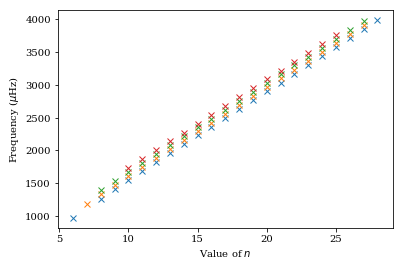

135.47200
135.68600
135.55400
135.65200


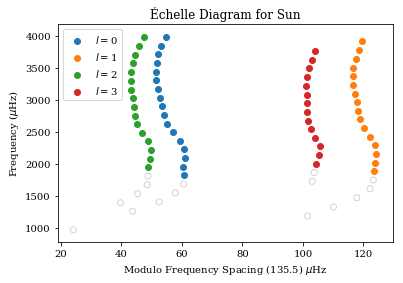

In [4]:
plt.figure(1)
plt.errorbar(l[0].n, l[0].nu, yerr=l[0].d_nu, fmt='x')
plt.errorbar(l[1].n, l[1].nu, yerr=l[1].d_nu, fmt='x')
plt.errorbar(l[2].n, l[2].nu, yerr=l[2].d_nu, fmt='x')
plt.errorbar(l[3].n, l[3].nu, yerr=l[3].d_nu, fmt='x')
plt.xlabel('Value of $n$')
plt.ylabel('Frequency ($\mu$Hz)')
plt.show()

print(u"%.5f" % np.median(np.diff(l[0].nu)))
print(u"%.5f" % np.median(np.diff(l[1].nu)))
print(u"%.5f" % np.median(np.diff(l[2].nu)))
print(u"%.5f" % np.median(np.diff(l[3].nu)))


# Échelle Plot for the data
mod = 135.5
plt.figure(2)
# New plotting method
for i in range(max(df.l)-min(df.l)+1):
    plt.scatter(df.loc[(df.l == i) & (df.n > 11)].nu % 135.5, df.loc[(df.l == i) & (df.n > 11)].nu,
                label=r'$l=$'+str(i))
    plt.scatter(df.loc[(df.l == i) & (df.n < 12)].nu % 135.5, df.loc[(df.l == i) & (df.n < 12)].nu,
                facecolors='none', edgecolors=['lightgrey'], label='')
plt.title('Échelle Diagram for Sun')
plt.xlabel('Modulo Frequency Spacing ('+ str(mod) +') $\mu$Hz')
plt.ylabel('Frequency ($\mu$Hz)')
plt.legend()
plt.show()

The above Échelle diagrams show how the four lowest modes form broadly straight lines in modulo frequency space, though there are significant deviations that form a tail at the lower values of $n$ (visible as faint circles). We shall select only the $l=0$ modes for analysis.



#### Using Vrard Paper

To compute the local frequency separation for a mode $\nu_{n,0}$ we use the average difference over the adjacent modes
$$ \Delta\nu(n) = \frac{\nu_{n+1,0} - \nu_{n-1,0}}{2}$$
which cannot be appropriately calculated for modes the limits of n.

The asymptotic dependence of the large frequency separation wrt. n is given in the paper as
$$ \Delta\nu_{\textrm{up}}(n) = \left( 1 + \alpha\left(n-n_\textrm{max}\right)\right) \left<\Delta\nu\right>$$
where $\alpha$ is defined by the power law $\alpha = A\left<\Delta\nu\right>^Β$. In the paper, the constants are set as $A=0.015$ and $B=-0.32$

Having calulated these extra frequencies $\Delta\nu_\textrm{up}$, the difference between the theoretical and observed large frequency separation is calculated with $\delta_\textrm{g,obs} = \Delta\nu(n) - \Delta\nu_{\textrm{up}}(n)$

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

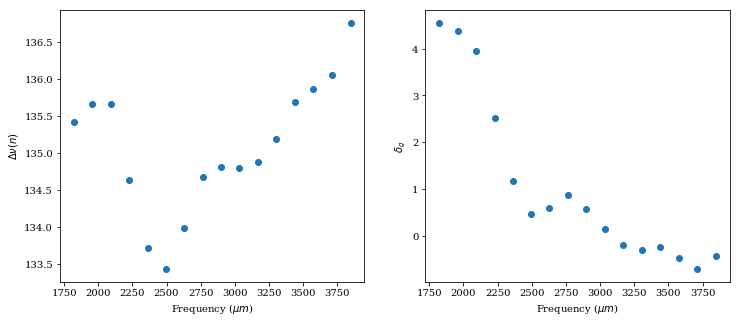

,n,l,nu,d_nu,dnu_n,dnu_up,dg
12,11,0,1686.597,0.011,NaN,130.438023,NaN
16,12,0,1822.196,0.011,135.4120,130.859606,4.552394
20,13,0,1957.421,0.012,135.6610,131.281190,4.379810
24,14,0,2093.518,0.013,135.6640,131.702773,3.961227
28,15,0,2228.749,0.014,134.6350,132.124356,2.510644
32,16,0,2362.788,0.016,133.7155,132.545939,1.169561
36,17,0,2496.180,0.017,133.4400,132.967522,0.472478
40,18,0,2629.668,0.015,133.9810,133.389105,0.591895
44,19,0,2764.142,0.015,134.6770,133.810688,0.866312
48,20,0,2899.022,0.013,134.8060,134.232271,0.573729


In [7]:
nmax = 22
# Modelling from Vrard Paper

l0 = df.loc[(df.l == 0) & (df.n > 10)]
l0['dnu_n'] = (l0['nu'].diff(2).shift(-1))/2   # Differences between neighbouring frequencies

alpha = 0.015*np.mean(l0['dnu_n'])**(-0.32)    # Equation provided in paper

l0['dnu_up'] = (1 + alpha*(l0['n']-nmax)) * (np.mean(l0['dnu_n']))   # Calculating Δν_up (see equation above)

l0['dg'] = l0['dnu_n']-l0['dnu_up']    # Difference between theoretical and observed large freq spacings


# Plots to replicate results of Figure 2 in the Vrard paper
plt.figure(10, figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(l0.nu, l0.dnu_n)
plt.xlabel(r'Frequency ($\mu m$)')
plt.ylabel(r'$\Delta\nu(n)$')
plt.subplot(1,2,2)
plt.scatter(l0.nu, l0.dg)
plt.xlabel(r'Frequency ($\mu m$)')
plt.ylabel(r'$\delta_g$')
plt.show()

#l0.to_csv('l0_test.csv')
#l0['y'] = 0.0000018703798342580922*l0['nu']**2 + l0['nu']*(-0.013109745137993805) + 22.46095493384917
#plt.scatter(l0.nu, l0.dg - l0.y)


l0

In order to provide Stan with suitable starting parameters (to prevent the complete lack of convergance), we shall first attempt to manually fit a rather basic model to the data.

$ \Delta\nu(n+\epsilon) + k(\frac{\nu_\textrm{max}}{\Delta\nu}+n)^2 + A\sin(\omega n+\phi)$

where the latter terms represent the curvature and oscillatory component. We can then attempt to replicate this using Stan.

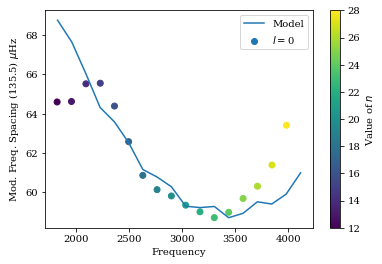

In [17]:
# Look at l=0 data initially only
plt.figure(3)
plt.scatter(df.loc[(df.l == 0) & (df.n > 11)].nu, df.loc[(df.l == 0) & (df.n > 11)].nu % 135.2,
            c=df.loc[(df.l == 0) & (df.n > 11)].n,cmap='viridis',
            label=r'$l=$'+str(0))
plt.colorbar(label=r'Value of $n$')


def model(n, dnu, numax, epsilon, k, A, omega, phi):
    freqs = (n + epsilon) * dnu
    nmax = numax/dnu + epsilon
    freqs += (nmax-n)**2 * k
    freqs += A*np.sin(omega*n + phi)
    return freqs

n = np.arange(12,30,1)
f = model(n, 135.2, 3050.0, 1.436, 0.07, 0.3, 2, 0)
plt.plot(f, f % 135.2, label='Model')
plt.xlabel('Frequency')
plt.ylabel(r'Mod. Freq. Spacing ('+ str(mod) +') $\mu$Hz')
plt.legend()
plt.show()

In [22]:
code = '''
functions {
    real model(real n, real dnu, real numax, real epsilon, real k, real A, real omega, real phi){
        return (dnu*(n+epsilon) + k*(numax/dnu + n)^2 + A*sin(omega*n + phi));
    }
}
data {
    int N;
    real n[N];
    real modfreq[N];
    real numax;
    real dnu;
}
parameters {
    real epsilon;
    real k;
    real A;
    real omega;
    real<lower = -2*pi(), upper = 2*pi()> phi;
}
model {
    real mod[N];
    for (i in 1:N){
        mod[i] = model(n[i],dnu, numax, epsilon, k, A, omega, phi);
    }
    
    mod ~ normal(modfreq,1);
    epsilon ~ normal(1.436, 0.1);
    k ~ normal(0.07, 0.002);
    A ~ normal(0.3, 0.1);
    omega ~ normal(2, 0.4);
    phi ~ normal(0, 1.5);
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6f44d27dcacbc515e7453b80f674c4c2 NOW.


In [33]:
stan_data = {'N': len(l0['n']),
             'n': l0['n'], 
             'modfreq': (l0['nu'] % 135.2),
             'numax': 3050.0,
             'dnu': 135.2}
start = {'epsilon': 1.436,
         'k': 0.07,
         'A': 0.3,
         'omega': 2,
         'phi': 0}
nchains = 4

fit = sm.sampling(data=stan_data, iter=5000, chains=nchains)

In [34]:
print(fit)

Inference for Stan model: anon_model_6f44d27dcacbc515e7453b80f674c4c2.
4 chains, each with iter=100000; warmup=50000; thin=1; 
post-warmup draws per chain=50000, total post-warmup draws=200000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
epsilon   0.75    0.04   0.05   0.65   0.71   0.77   0.78   0.79      2   7.85
k        -1.49  3.0e-3 4.3e-3  -1.49  -1.49  -1.49  -1.49  -1.48      2   8.59
A        -1.71    2.54   3.59  -7.47  -5.01  -0.48    1.4    1.6      2  39.63
omega    -0.16    0.86   1.22   -1.5  -1.14  -0.47   0.87   1.83      2  172.8
phi      -1.06    3.62   5.12  -6.28  -5.89  -1.94   3.54   6.26      2  66.08
lp__    -3.4e5  803.48 1136.2 -3.4e5 -3.4e5 -3.4e5 -3.4e5 -3.4e5      2 753.95

Samples were drawn using NUTS at Wed Nov 28 19:41:42 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


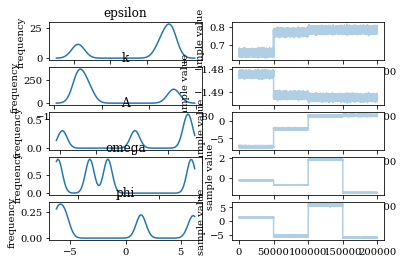

In [35]:
fit.plot()
plt.show()

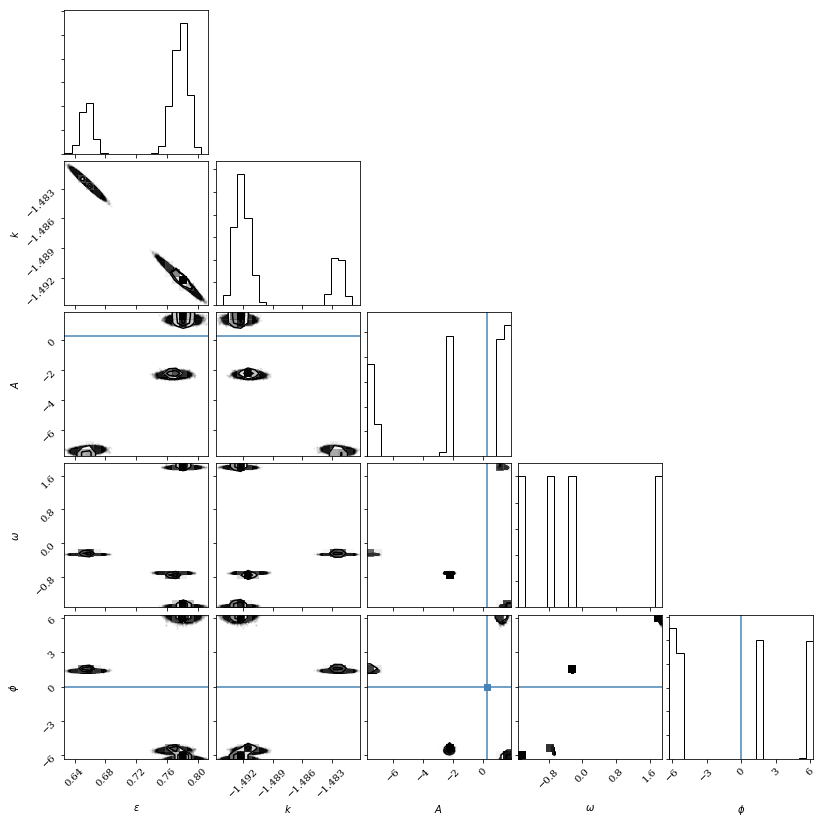

In [36]:
import corner
data = np.vstack([fit['epsilon'], (fit['k']), fit['A'], fit['omega'], fit['phi']]).T
corner.corner(data, labels=[r'$\epsilon$', r'$k$', r'$A$', r'$\omega$', r'$\phi$'], truths=[1.436, 0.07, 0.3, 2, 0])
plt.show()

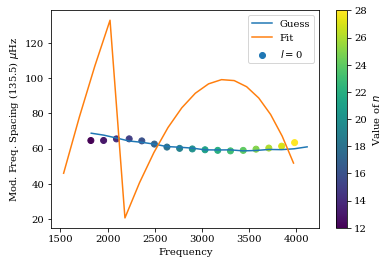

In [37]:
n = np.arange(12,30,1)

plt.figure(4)
plt.scatter(df.loc[(df.l == 0) & (df.n > 11)].nu, df.loc[(df.l == 0) & (df.n > 11)].nu % 135.2,
            c=df.loc[(df.l == 0) & (df.n > 11)].n,cmap='viridis',
            label=r'$l=$'+str(0))
plt.colorbar(label=r'Value of $n$')
f = model(n, 135.2, 3050.0, 1.436, 0.07, 0.3, 2, 0)
g = model(n, 135.2, 3050.0, fit['epsilon'].mean(), fit['k'].mean(),
          fit['A'].mean(), fit['omega'].mean(), fit['phi'].mean())
plt.plot(f, f % 135.2, label='Guess')
plt.plot(g, g % 135.2, label='Fit')
plt.xlabel('Frequency')
plt.ylabel(r'Mod. Freq. Spacing ('+ str(mod) +') $\mu$Hz')
plt.legend()
plt.show()

___
#### Old Model
Having obtained our results for the difference between the observed and theoretical large frequency spacing, we can attempt to model the resultant variations using the following relation 
$$ \delta_{g, obs} = \mathcal{A} \left(\left<\Delta\nu\right>\right) \left( \frac{2\pi(\nu-\nu_{\textrm{max}})}{\mathcal{G}\left(\left<\Delta\nu\right>\right)} + \phi \right) $$
where $\mathcal{G}$ and $\mathcal{A}$ are the period and amplitude of the oscillation expressed in units of $\left<\Delta\nu\right>$

In [157]:
code = '''
functions {
    real dgobs(real A, real nu, real numax, real G, real phi){
        return A * cos((2*pi()*(nu-numax)/G)+phi);
    }
}
data {
    int N;
    real nu[N];
    real dg[N];
    real numax;
}
parameters {
    real A;
    real G;
    real<lower = -2*pi(), upper = 2*pi()> phi;
    real dg_unc[N];
}
model {

    real mod[N];
    for (i in 1:N){
        mod[i] = dgobs(A, nu[i], numax, G, phi);
    }
    mod ~ normal(dg,dg_unc);
    A ~ normal(0.015*135.4^(-0.32), 0.01);
    G ~ normal(100.0, 1);
    phi ~ normal(0, 1.5);
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fe59f979510b86506d2ff8fa0f5119c7 NOW.


In [158]:
stan_data = {'N': len(l0['nu']),
             'nu': l0['nu'], 
             'dg': l0['dg'],
             'numax': 3168.6}
#start = {'beta': 0.5}
nchains = 4

fit = sm.sampling(data=stan_data, iter=1000, chains=nchains)

RuntimeError: Initialization failed.